In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
#unhash to run CNN 

#import tensorflow.keras.layers as L
#import tensorflow as tf
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#from keras.utils import np_utils

In [3]:
Crema_Path='Crema/'
Ravdess_Path='audio_speech_actors_01-24/'
Savee_Path='Savee/'
Tess_Path='Tess/'

In [4]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,angry,Crema//1022_ITS_ANG_XX.wav
1,angry,Crema//1037_ITS_ANG_XX.wav
2,neutral,Crema//1060_ITS_NEU_XX.wav
3,neutral,Crema//1075_ITS_NEU_XX.wav
4,disgust,Crema//1073_IOM_DIS_XX.wav


In [5]:
Crema_df['Emotion'].unique()

array(['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
      dtype=object)

In [6]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,angry,audio_speech_actors_01-24/Actor_16/03-01-05-01...
1,fear,audio_speech_actors_01-24/Actor_16/03-01-06-01...
2,fear,audio_speech_actors_01-24/Actor_16/03-01-06-02...
3,angry,audio_speech_actors_01-24/Actor_16/03-01-05-02...
4,disgust,audio_speech_actors_01-24/Actor_16/03-01-07-01...


In [7]:
Ravdess_df['Emotion'].unique()

array(['angry', 'fear', 'disgust', 'sad', 'surprise', 'happy', 'neutral'],
      dtype=object)

In [8]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,sad,Savee//JK_sa01.wav
1,sad,Savee//JK_sa15.wav
2,neutral,Savee//DC_n13.wav
3,surprise,Savee//DC_su09.wav
4,neutral,Savee//DC_n07.wav


In [9]:
Savee_df['Emotion'].unique()

array(['sad', 'neutral', 'surprise', 'fear', 'disgust', 'happy', 'angry'],
      dtype=object)

In [10]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,disgust,Tess/YAF_disgust/YAF_date_disgust.wav
1,disgust,Tess/YAF_disgust/YAF_rag_disgust.wav
2,disgust,Tess/YAF_disgust/YAF_raise_disgust.wav
3,disgust,Tess/YAF_disgust/YAF_ditch_disgust.wav
4,disgust,Tess/YAF_disgust/YAF_door_disgust.wav


In [11]:
Tess_df['Emotion'].unique()

array(['disgust', 'surprise', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)

In [12]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [13]:
main_df.head(15)

,Emotion,File_Path
0,angry,Crema//1022_ITS_ANG_XX.wav
1,angry,Crema//1037_ITS_ANG_XX.wav
2,neutral,Crema//1060_ITS_NEU_XX.wav
3,neutral,Crema//1075_ITS_NEU_XX.wav
4,disgust,Crema//1073_IOM_DIS_XX.wav
5,disgust,Crema//1066_IOM_DIS_XX.wav
6,sad,Crema//1078_IWL_SAD_XX.wav
7,fear,Crema//1029_TAI_FEA_XX.wav
8,sad,Crema//1039_IEO_SAD_MD.wav
9,happy,Crema//1008_TAI_HAP_XX.wav


In [14]:
main_df.tail(15)

,Emotion,File_Path
2785,sad,Tess/OAF_Sad/OAF_void_sad.wav
2786,sad,Tess/OAF_Sad/OAF_dog_sad.wav
2787,sad,Tess/OAF_Sad/OAF_rag_sad.wav
2788,sad,Tess/OAF_Sad/OAF_dip_sad.wav
2789,sad,Tess/OAF_Sad/OAF_rush_sad.wav
2790,sad,Tess/OAF_Sad/OAF_shack_sad.wav
2791,sad,Tess/OAF_Sad/OAF_lean_sad.wav
2792,sad,Tess/OAF_Sad/OAF_join_sad.wav
2793,sad,Tess/OAF_Sad/OAF_rough_sad.wav
2794,sad,Tess/OAF_Sad/OAF_fail_sad.wav


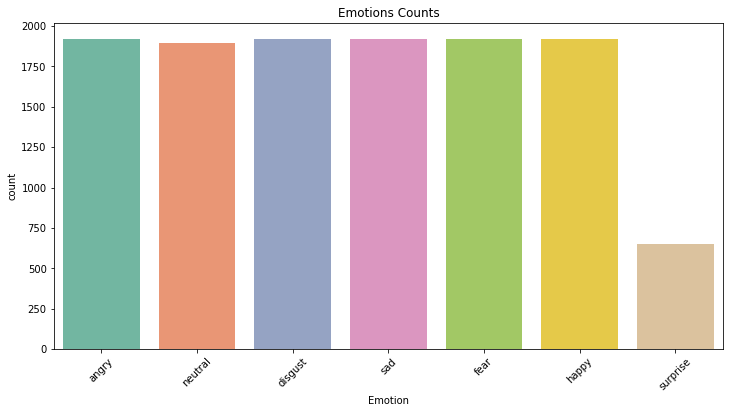

In [15]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [16]:
emotion_names=main_df['Emotion'].unique()

colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [17]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

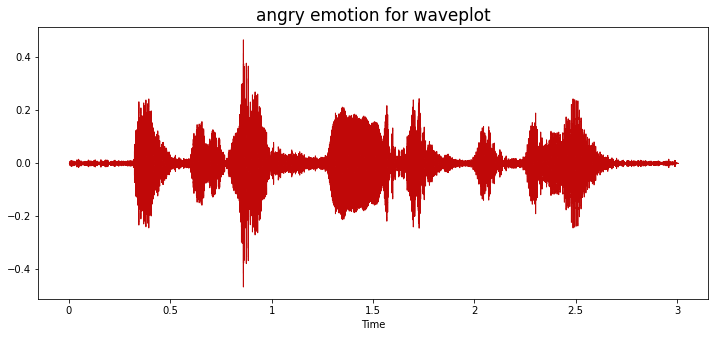

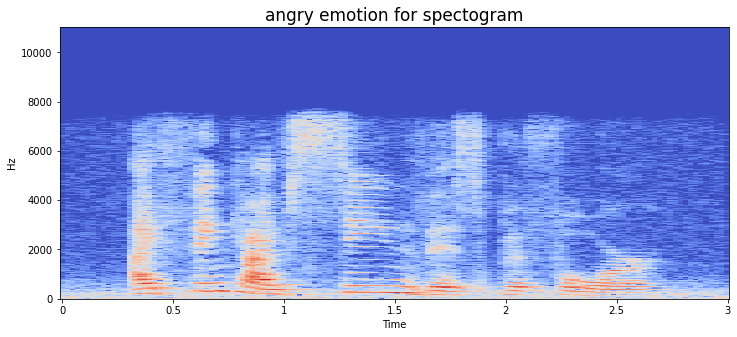

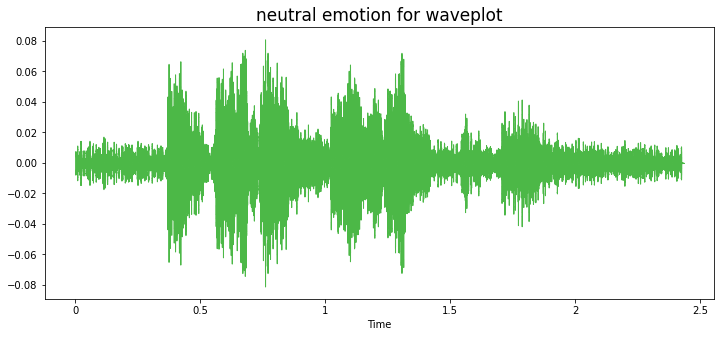

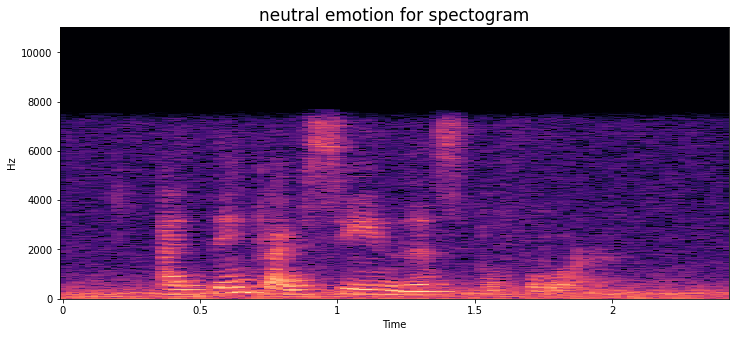

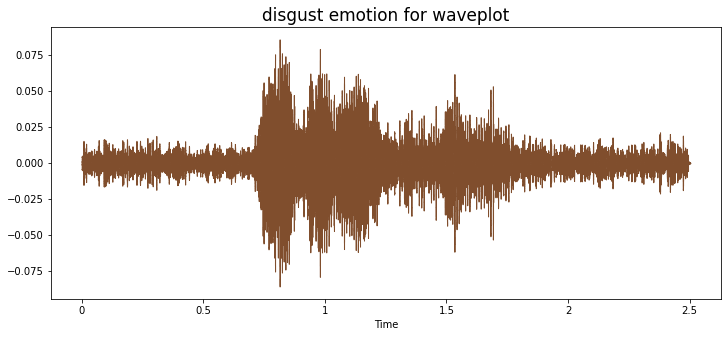

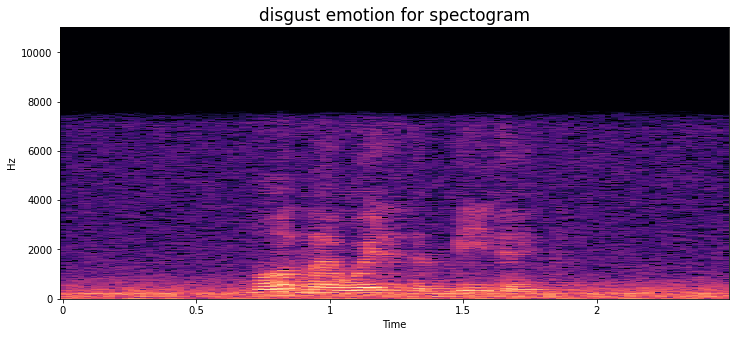

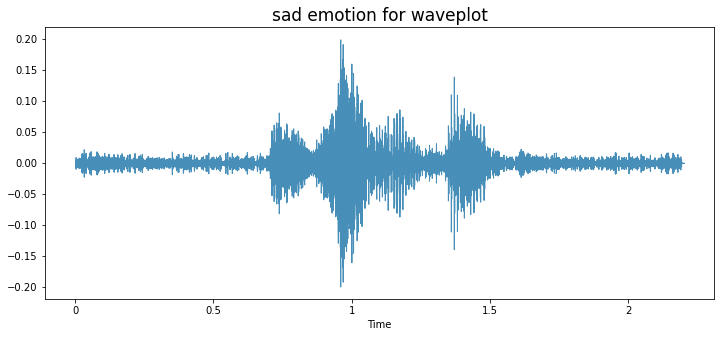

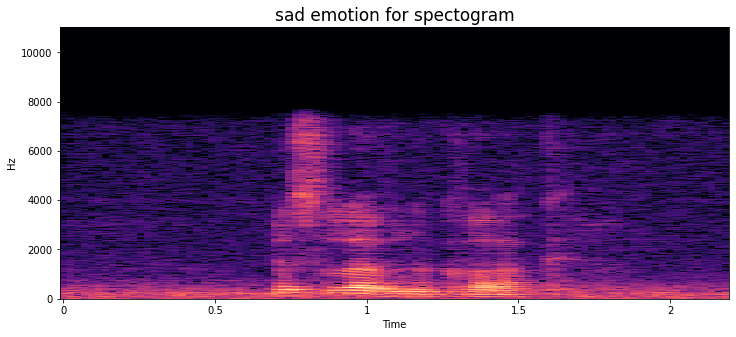

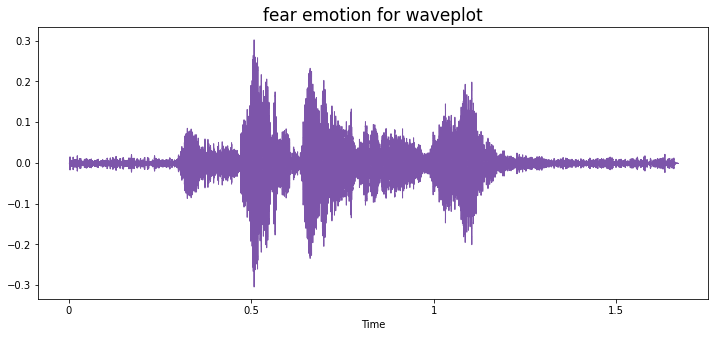

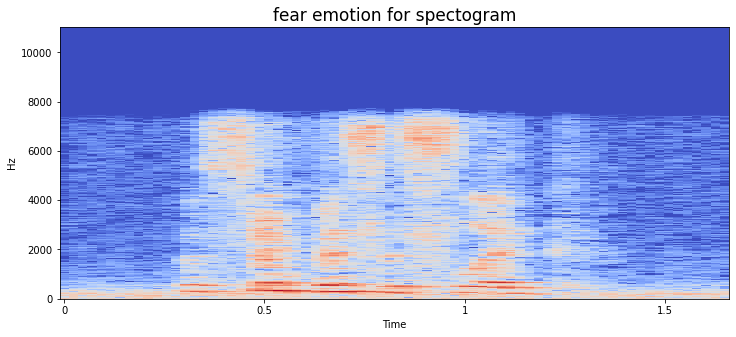

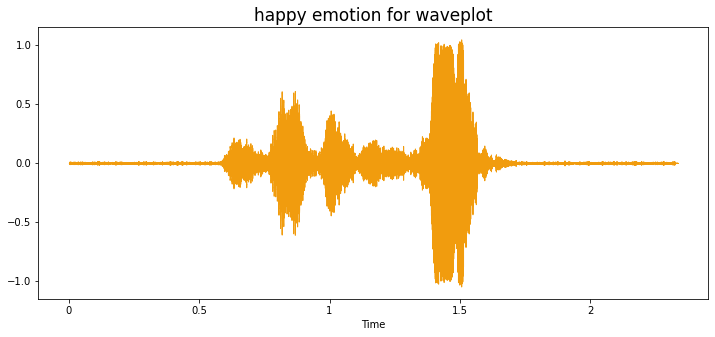

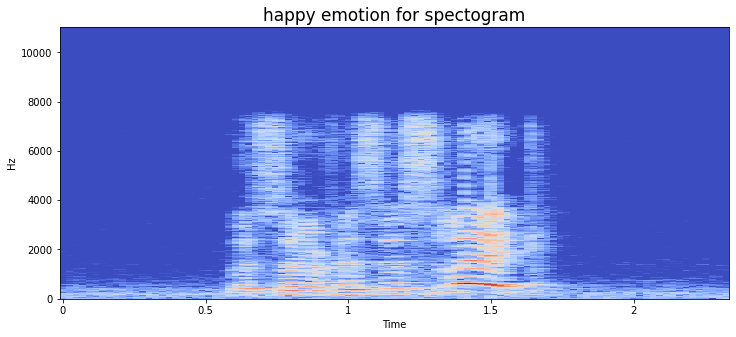

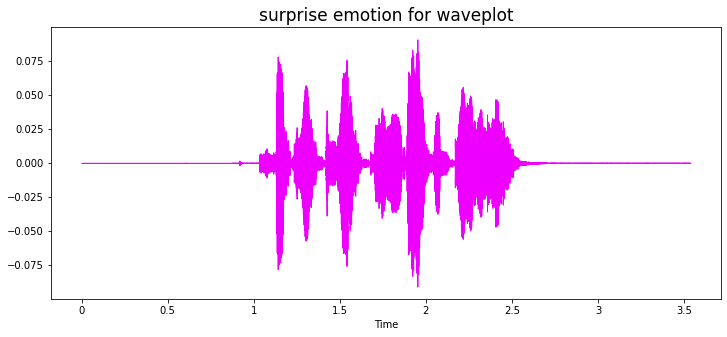

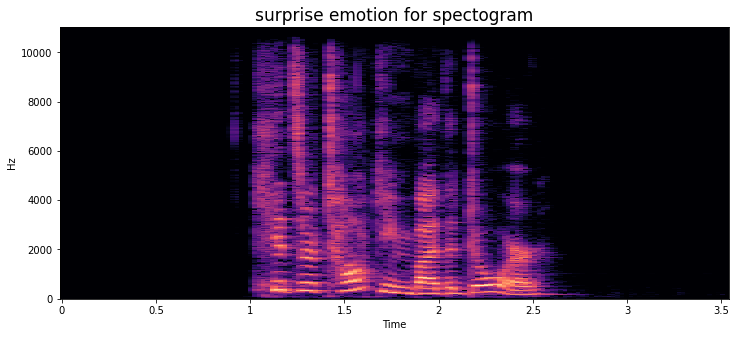

In [18]:
import librosa
import librosa.display

audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [19]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [20]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [21]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [22]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [23]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [24]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [25]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



In [26]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

In [27]:
def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

In [28]:
def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

In [29]:
def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)
    
data,sr=librosa.load(audio_path[6])

Original Audio


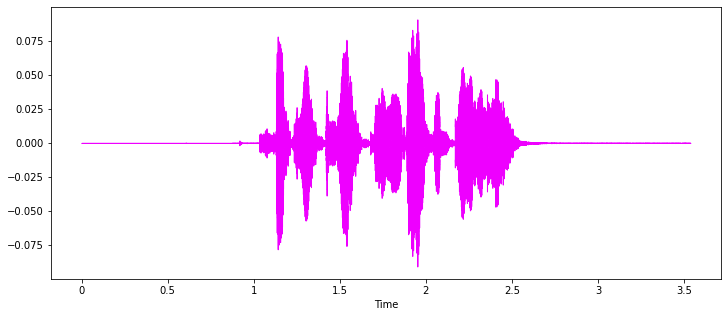

In [30]:
print("Original Audio")
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])

Noised Audio


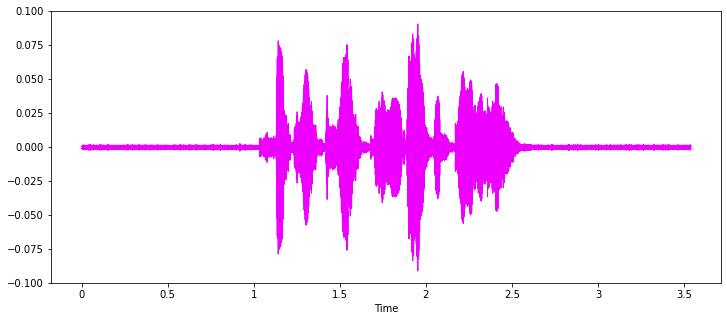

In [31]:
print("Noised Audio")
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

Stretched Audio


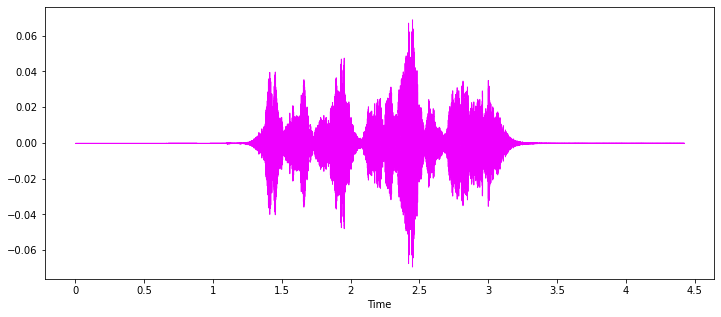

In [32]:
print("Stretched Audio")
stretched_audio=streching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)

Shifted ausio


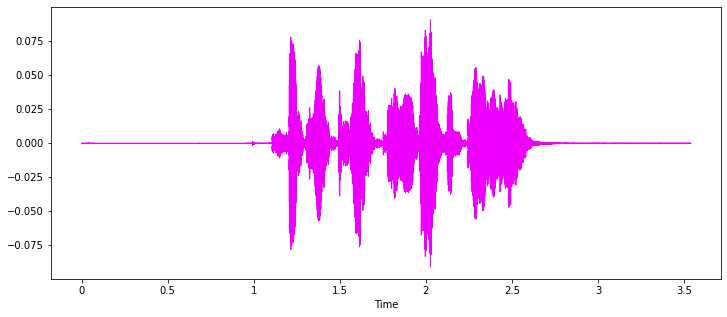

In [33]:
print("Shifted ausio")
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

Pitched audio


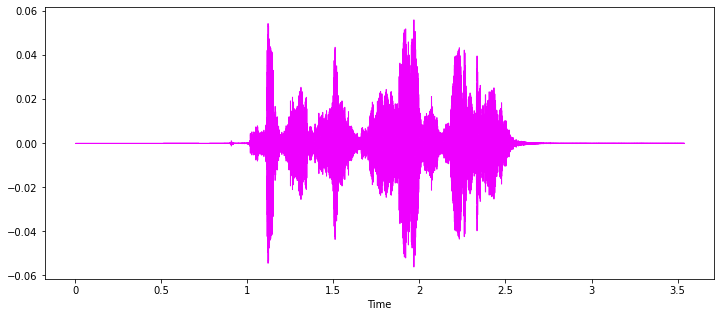

In [34]:
print("Pitched audio")
pitched_audio=pitching(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)

In [35]:
#Feature Extraction
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [36]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [37]:
processed_data_path='processed_data.csv'

In [38]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.042480,0.080566,0.148438,0.217773,0.325195,0.419434,0.458008,0.410156,0.314941,0.213379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.061035,0.116699,0.195312,0.266602,0.363281,0.437500,0.470703,0.413086,0.323730,0.225098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.044922,0.079102,0.160156,0.242188,0.341797,0.437500,0.441406,0.374512,0.282227,0.192383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.093750,0.172852,0.290039,0.365723,0.439453,0.492676,0.471191,0.410645,0.326172,0.241699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.061035,0.086426,0.107910,0.092773,0.062988,0.044434,0.040527,0.041016,0.046387,0.063965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
5,0.070801,0.101074,0.130371,0.113281,0.087402,0.071777,0.103027,0.103516,0.107910,0.117676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
6,0.061035,0.099121,0.122070,0.109375,0.078613,0.047363,0.033691,0.036621,0.047852,0.063965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
7,0.083008,0.133789,0.166504,0.149902,0.124023,0.106934,0.118652,0.138184,0.142578,0.136719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
8,0.023438,0.032715,0.040527,0.038574,0.044434,0.053223,0.068848,0.077148,0.083008,0.080078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
9,0.023438,0.031738,0.043457,0.046387,0.055176,0.064941,0.077637,0.083008,0.087891,0.086914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral


In [39]:
#Including Analyzed Audio Feature

df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [40]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [41]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.042480,0.080566,0.148438,0.217773,0.325195,0.419434,0.458008,0.410156,0.314941,0.213379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
1,0.061035,0.116699,0.195312,0.266602,0.363281,0.437500,0.470703,0.413086,0.323730,0.225098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
2,0.044922,0.079102,0.160156,0.242188,0.341797,0.437500,0.441406,0.374512,0.282227,0.192383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
3,0.093750,0.172852,0.290039,0.365723,0.439453,0.492676,0.471191,0.410645,0.326172,0.241699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
4,0.061035,0.086426,0.107910,0.092773,0.062988,0.044434,0.040527,0.041016,0.046387,0.063965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
5,0.070801,0.101074,0.130371,0.113281,0.087402,0.071777,0.103027,0.103516,0.107910,0.117676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
6,0.061035,0.099121,0.122070,0.109375,0.078613,0.047363,0.033691,0.036621,0.047852,0.063965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
7,0.083008,0.133789,0.166504,0.149902,0.124023,0.106934,0.118652,0.138184,0.142578,0.136719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,angry
8,0.023438,0.032715,0.040527,0.038574,0.044434,0.053223,0.068848,0.077148,0.083008,0.080078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
9,0.023438,0.031738,0.043457,0.046387,0.055176,0.064941,0.077637,0.083008,0.087891,0.086914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


In [42]:
#Processing Analyzed Data for Training

X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [43]:
#lb=LabelEncoder()
#Y=np_utils.to_categorical(lb.fit_transform(Y))
#print(lb.classes_)
#Y

In [44]:
#Train, Test and Validation Spliting
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918,), (9730,))

In [45]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026,), (9730,), (3892,))

In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026,), (9730,), (3892,))

In [47]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

In [48]:
#Use ML algorithms from here to calculate accuracy